In [4]:
import requests
import pandas as pd
import numpy as np
import matplotlib
import bs4
from bs4 import BeautifulSoup

In [6]:
#Main program 1
def return_seinfeld_episode_links():
    url = "http://www.seinfeldscripts.com/seinfeld-scripts.html"   
    r = requests.get(url)
    soup = BeautifulSoup(r.content, 'html.parser')
    list_seinfeld = []
    list_seinfeld_ = []
    first_i = 0
    last_i = 0
    first = "TheSeinfeldChronicles"
    last = "The Finale (2)"
    list_sein_main = soup.find_all('a', href=True)
    for i in range(len(list_sein_main)):
        element = list_sein_main[i]
        if first in str(element):
            first_i = i
        if last in str(element):
            last_i = i
    list_seinfeld = list_sein_main[first_i:last_i+1]
    prefix = "http://www.seinfeldscripts.com/"
    for i in list_seinfeld:
        list_seinfeld_.append(prefix+i['href'].strip())
    print(first_i,last_i)
    return list_seinfeld_

In [7]:
#Main program 2

episode_list = return_seinfeld_episode_links()

13 192


In [9]:
episode_frame = pd.DataFrame(episode_list,columns=["Episode_name"])

In [10]:
episode_frame = episode_frame.reset_index()

In [11]:
episode_frame = episode_frame.rename(columns={"index":"episode_num"})

In [12]:
(episode_frame[["Episode_name"]].values[0])

array(['http://www.seinfeldscripts.com/TheSeinfeldChronicles.htm'],
      dtype=object)

In [13]:
#Main program 3
def generate_seasons(li):
    epi_dict={}
    epi_dict["S01"]=[(''.join(li[0]))]
    epi_dict["S02"]=li[1:5]
    epi_dict["S03"]=li[5:17]
    epi_dict["S04"]=li[17:40]
    epi_dict["S05"]=li[40:64]
    epi_dict["S06"]=li[64:86]
    epi_dict["S07"]=li[86:110]
    epi_dict["S08"]=li[110:134]
    epi_dict["S09"]=li[134:156]
    epi_dict["S10"]=li[156:]
    return epi_dict

In [14]:
#Main program 4
epi_dict = generate_seasons(episode_list)

In [18]:
epi_dict['S02']

['http://www.seinfeldscripts.com/TheStakeout.htm',
 'http://www.seinfeldscripts.com/TheRobbery.htm',
 'http://www.seinfeldscripts.com/MaleUnbonding.htm',
 'http://www.seinfeldscripts.com/TheStockTip.htm']

In [19]:
def get_individual_episode(episode_num):
        prefix = "http://www.seinfeldscripts.com/"
        episode_name = episode_list[int(episode_num)]
        i = prefix+episode_name.strip()
        print(i)
        req = requests.get(i)
        f = open('/home/abhi/Desktop/Seinfeld/missing/'+str(episode_num), 'wb')
        f.write(req.content)
        f.close()

In [22]:
#Main Program 5
import time
def get_script(season_list,start):
    count = start
    for i in season_list:
        print(i)
        req = requests.get(i)
        f = open('/media/abhiram/Data/Code/github/DataViz/outputs/'+str(start), 'wb')
        start=start+1
        f.write(req.content)
        f.close()
        time.sleep(1)

In [23]:
#Main Program 6
get_script(epi_dict['S10'],157) #Obtaining contents per request

http://www.seinfeldscripts.com/TheButterShave.htm
http://www.seinfeldscripts.com/TheVoice.htm
http://www.seinfeldscripts.com/TheSerenityNow.htm
http://www.seinfeldscripts.com/TheBlood.html
http://www.seinfeldscripts.com/TheJunkMail.htm
http://www.seinfeldscripts.com/TheMervGriffinShow.htm
http://www.seinfeldscripts.com/TheSlicer.html
http://www.seinfeldscripts.com/TheBetrayal.htm
http://www.seinfeldscripts.com/TheApology.htm
http://www.seinfeldscripts.com/TheStrike.htm
http://www.seinfeldscripts.com/TheDealership.htm
http://www.seinfeldscripts.com/TheReversePeephole.htm
http://www.seinfeldscripts.com/TheCartoon.htm
http://www.seinfeldscripts.com/TheStrongbox.htm
http://www.seinfeldscripts.com/TheWizard.htm
http://www.seinfeldscripts.com/TheBurning.html
http://www.seinfeldscripts.com/TheBookstore.htm
http://www.seinfeldscripts.com/TheFrogger.htm
http://www.seinfeldscripts.com/TheMaid.htm
http://www.seinfeldscripts.com/ThePuertoRicanDay.htm
http://www.seinfeldscripts.com/The-Clip-Show-1.

In [27]:
epi_dict['S02']

['http://www.seinfeldscripts.com/TheStakeout.htm',
 'http://www.seinfeldscripts.com/TheRobbery.htm',
 'http://www.seinfeldscripts.com/MaleUnbonding.htm',
 'http://www.seinfeldscripts.com/TheStockTip.htm']

In [29]:
url = "http://www.seinfeldscripts.com/seinfeld-scripts.html"   
r = requests.get(url)
soup = BeautifulSoup(r.content, 'html.parser')

In [30]:
list_sein_main = soup.find_all('a', href=True)

In [32]:
for i in list_sein_main:
    print((i))

<a href="index.html">Home</a>
<a href="seinfeld-scripts.html">Scripts</a>
<a href="episodes_oveview.html">Episodes</a>
<a href="seinfeld-characters.html">Characters</a>
<a href="buy-seinfeld.html">Gifts</a>
<a class="addthis_button_compact" href="http://addthis.com/bookmark.php?v=250&amp;username=doctoroids" style="padding: 8px 3px 8px 160px">Share</a>
<a href="http://community.seinfeldscripts.com">Click Here to join our new Seinfeld's fans community!</a>
<a href="buy-seinfeld.html">Seinfeld Gift Guide right now</a>
<a href="seinfeld-t-shirt.html">T-Shirts</a>
<a href="seinfeld-dvd.html">DVDs</a>
<a href="episodes_oveview.html">Seinfeld Season guide</a>
<a href="alpha.html"><b>Browse the scripts in aplphabetical order</b></a>
<a href="    http://www.shareasale.com/r.cfm?u=439896&amp;b=119192&amp;m=16934&amp;afftrack=seinfeldScriptsTop&amp;urllink=search%2E80stees%2Ecom%2F%3Fcategory%3D80s%2BTV%26i%3D1%26theme%3DSeinfeld%26u1%3Dcategory%26u2%3Dtheme" target="_blank"><img alt="Buy Seinfe

# TEST

In [56]:
link = prefix+"ThePonyRemark.htm"

In [57]:
link

'http://www.seinfeldscripts.com/ThePonyRemark.htm'

In [58]:
r

<Response [200]>

In [59]:
r2 = requests.get(link)

In [60]:
r2

<Response [200]>

In [61]:
soup2 = BeautifulSoup(r2.content, 'html.parser')

In [63]:
paras = soup2.find_all('p')


In [65]:
len(paras)

325

In [77]:
paras[11]

<p>JERRY: My parents live in Florida now. They moved there last year. 
              They didn't want to move to Floriday, but they're in their sixties, 
              and that's the law. You know</p>

In [78]:
link2 = "http://www.seinfeldscripts.com/TheSeinfeldChronicles.htm"

In [79]:
r3 = requests.get(link2)

In [80]:
soup3 = BeautifulSoup(r3.content, 'html.parser')

In [81]:
paras2 = soup3.find_all('p')


In [470]:
def find_scene(li):
    val = 0
    for i in li:
        #print((str(i.text)))
        if "<p> </p>," in str(i):
            val = i
            break
    if val == 0:
        return 0
    else:
        return li.index(val)

In [471]:
find_scene_res = find_scene(paras2)

In [472]:
paras[3]

<p>Directed by: Tom Cherones</p>

In [164]:
chars_dict={}
lol = []
for i in paras:
    lol.append(i.text.strip().split(' '))
for i in lol:
    for j in i:
        if j.isupper() and len(j)>1 and ':' in j:
            print(j)
            if j in chars_dict:
                chars_dict[j]=chars_dict[j]+1
            else:
                chars_dict[j]=1
print(chars_dict)
                

JERRY:
HELEN:
MORTY:
HELEN:
MORTY:
HELEN:
MORTY:
HELEN:
HELEN:
JERRY:
MORTY:
JERRY:
HELEN:
JERRY:
MORTY:
HELEN:
JERRY:
HELEN:
MORTY:
JERRY:
HELEN:
JERRY:
MORTY:
HELEN:
MORTY:
JERRY:
MORTY:
JERRY:
KRAMER:
MORTY:
KRAMER:
JERRY:
KRAMER:
JERRY:
KRAMER:
JERRY:
KRAMER:
JERRY:
KRAMER:
JERRY:
KRAMER:
MORTY:
KRAMER:
JERRY:
KRAMER:
JERRY:
KRAMER:
JERRY:
KRAMER:
MORTY:
JERRY:
KRAMER:
JERRY:
HELEN:
KRAMER:
JERRY:
KRAMER:
JERRY:
JERRY:
ELAINE:
LEO:
JERRY:
LEO:
JERRY:
LEO:
JERRY:
LEO:
JERRY:
ELAINE:
JERRY:
ELAINE:
MORTY:
JERRY:
MANYA:
ELAINE:
JERRY:
MANYA:
HELEN:
MANYA:
HELEN:
MANYA:
HELEN:
JERRY:
ELAINE:
JERRY:
MANYA:
JERRY:
MANYA:
JERRY:
HELEN:
MANYA:
JERRY:
MANYA:
JERRY:
MANYA:
ISAAC:
JERRY:
JERRY:
HELEN:
JERRY:
HELEN:
MORTY:
JERRY:
HELEN:
JERRY:
KRAMER:
MORTY:
KRAMER:
JERRY:
HELEN:
JERRY:
HELEN:
MORTY:
JERRY:
MORTY:
KRAMER:
JERRY:
KRAMER:
JERRY:
KRAMER:
JERRY:
KRAMER:
JERRY:
KRAMER:
JERRY:
KRAMER:
JERRY:
HELEN:
JERRY:
HELEN:
JERRY:
MORTY:
HELEN:
JERRY:
HELEN:
JERRY:
HELEN:
JERRY:
MORTY:
JERRY:
M

In [153]:
lol

[['<!--\ngoogle_ad_client',
  '=',
  '"ca-pub-4355410371465348";\n/*',
  'html-in_content-top_left',
  '*/\ngoogle_ad_slot',
  '=',
  '"4619537930";\ngoogle_ad_width',
  '=',
  '300;\ngoogle_ad_height',
  '=',
  '250;\n//-->\n\n\n\n\n\nLooking',
  'for',
  '',
  'a',
  'great',
  'gift',
  'idea',
  'for',
  'the',
  'holidays?',
  'Check',
  'out',
  'our',
  'complete',
  'Seinfeld',
  'Gift',
  'Guide',
  'right',
  'now!',
  'Including',
  'T-Shirts,',
  'DVDs,',
  '',
  'and',
  'more!\xa0\n',
  '',
  '',
  '',
  '',
  '',
  '',
  '\n',
  '',
  '',
  '',
  '',
  '',
  'Written',
  'by:',
  'Larry',
  'David',
  'and',
  'Jerry',
  'Seinfeld'],
 ['Looking',
  'for',
  '',
  'a',
  'great',
  'gift',
  'idea',
  'for',
  'the',
  'holidays?',
  'Check',
  'out',
  'our',
  'complete',
  'Seinfeld',
  'Gift',
  'Guide',
  'right',
  'now!',
  'Including',
  'T-Shirts,',
  'DVDs,',
  '',
  'and',
  'more!'],
 [''],
 ['Directed', 'by:', 'Tom', 'Cherones'],
 ['Broadcasted:', 'January', 

## SEASON 2

In [208]:
paragraphs =[]


In [209]:
with open("/home/abhi/Desktop/Seinfeld/2","rb") as binary_file:
    # Read the whole file at once
    data = binary_file.read()

In [210]:
soup4 = BeautifulSoup(data, 'html.parser')

In [211]:
soup4

<!DOCTYPE html PUBLIC "-//W3C//DTD XHTML 1.0 Transitional//EN" "http://www.w3.org/TR/xhtml1/DTD/xhtml1-transitional.dtd">

<html xmlns="http://www.w3.org/1999/xhtml" xmlns:fb="http://www.facebook.com/2008/fbml" xmlns:og="http://opengraphprotocol.org/schema/"><!-- InstanceBegin template="/Templates/seinfeld.dwt" codeOutsideHTMLIsLocked="false" -->
<head>
<meta content="text/html; charset=utf-8" http-equiv="Content-Type"/>
<meta content="Doctoroids" name="AUTHOR"/>
<meta content="© 2002-2010 Doctoroids" name="COPYRIGHT"/>
<!-- InstanceBeginEditable name="doctitle" -->
<title>Seinfeld Scripts - The Stakeout </title>
<!-- InstanceEndEditable -->
<link href="support-files/seinfeld.css" rel="stylesheet" type="text/css"/>
<!-- InstanceBeginEditable name="docdescription" -->
<meta content="Want to know what Kramer told Seinfeld? Read the full scritpt of The Stakeout. Full Seinfeld scripts and episodes" name="description"/>
<!-- InstanceEndEditable -->
<!-- InstanceBeginEditable name="dockeywor

In [212]:
paras4 = soup4.find_all('p')

In [218]:
chars_dict={}
lol = []
for i in paras4:
    lol.append(i.text.strip().split(' '))
for i in lol:
    for j in i:
        if ':' in j or (j.isupper() and len(j)>1 and ':' in j):
            #print(j)
            if j in chars_dict:
                chars_dict[j]=chars_dict[j]+1
            else:
                chars_dict[j]=1
filtered_dict = {k:v for k,v in chars_dict.items() if v >1}                
print(filtered_dict)
                

{'Helen:': 38, 'Morty:': 21, 'Mac:': 3, 'Pamela:': 5, 'Kramer:': 5, 'Elaine:': 53, 'Roger:': 2, 'Carol:': 3, 'Jerry:': 161, 'Vanessa:': 22, 'George:': 29, 'Artie:': 4}


In [424]:
paras4

[]

In [178]:
#Main program 7
import glob
import numpy as np
import collections
def return_character_freq(paragraphs):
    flag =0
    chars_dict={}
    chars_dict['TOTAL']=0
    cleaned_paras = []
    for i in paragraphs:
        cleaned_paras.append(i.text.strip().split(' '))
    if "JERRY" in np.concatenate(cleaned_paras):
        flag =1
    for i in cleaned_paras[2:]:
        for j in i:
            if flag == 0:
                if ':' in j:
                #print(j)
                    if j in chars_dict:
                        chars_dict[j]=chars_dict[j]+1
                        chars_dict['TOTAL']=chars_dict['TOTAL']+1
                    else:
                        chars_dict[j]=1
                        chars_dict['TOTAL']=chars_dict['TOTAL']+1
            elif flag == 1:
                if (j.isupper() and len(j)>1 and ':' in j):
                    if j in chars_dict:
                        chars_dict[j]=chars_dict[j]+1
                        chars_dict['TOTAL']=chars_dict['TOTAL']+1
                    else:
                        chars_dict[j]=1
                        chars_dict['TOTAL']=chars_dict['TOTAL']+1
                        
    filtered_dict = {k:v for k,v in chars_dict.items() if v >1}                
    return filtered_dict

episodes = collections.OrderedDict()
seinfeld_files = glob.glob("/home/abhi/Desktop/Seinfeld/*")
for i in seinfeld_files:
    with open(i,"rb") as binary_file:
    # Read the whole file at once
        data = binary_file.read()        
    soup_ = BeautifulSoup(data, 'html.parser')
    paragraphs = soup_.find_all('p')
    dicts = return_character_freq(paragraphs)
    episodes[i]= dicts
    
print(episodes)

OrderedDict([('/home/abhi/Desktop/Seinfeld/11', {'KRAMER:': 29, 'RAVA:': 22, 'TOTAL': 278, 'GEORGE:': 52, 'ELAINE:': 42, 'JERRY:': 81, 'MAN:': 2, 'RAY:': 48}), ('/home/abhi/Desktop/Seinfeld/36', {'Dan:': 8, 'Jerry):': 2, 'George:': 85, 'Elaine:': 31, 'George):': 2, 'Jodi:': 3, 'Kramer:': 29, 'Jerry:': 65, 'Chauffer:': 6, 'Tim:': 14, 'TOTAL': 275, 'Eva:': 10, 'Man:': 5}), ('/home/abhi/Desktop/Seinfeld/40', {'GIRLFRIEND:': 5, 'ELAINE:': 33, 'JERRY:': 84, 'NEWMAN:': 10, 'GEORGE:': 62, 'KRAMER:': 56, 'BERGEN:': 5, 'TOTAL': 262, 'WOMAN:': 5}), ('/home/abhi/Desktop/Seinfeld/155', {'1:': 3, 'TOTAL': 292, 'George:': 40, 'Steinbrenner:': 8, 'this:': 2, 'Elaine:': 38, 'Woman:': 3, 'Lippman:': 17, 'Rebecca:': 8, 'Kramer:': 62, 'Peterman:': 2, 'Tyler:': 3, 'Alex:': 7, 'Newman:': 3, 'Jerry:': 56, 'Bartender:': 2, 'Man:': 10, '2:': 4, 'Anne:': 15}), ('/home/abhi/Desktop/Seinfeld/81', {'KRAMER:': 22, 'HELEN:': 7, 'GEORGE:': 25, 'ELAINE:': 55, 'JERRY:': 88, 'MERYL:': 39, 'WAITRESS:': 2, 'MORTY:': 3, '

In [435]:
seinfeld_files.sort()

In [436]:
seinfeld_files

['/home/abhi/Desktop/Seinfeld/1',
 '/home/abhi/Desktop/Seinfeld/10',
 '/home/abhi/Desktop/Seinfeld/100',
 '/home/abhi/Desktop/Seinfeld/101',
 '/home/abhi/Desktop/Seinfeld/102',
 '/home/abhi/Desktop/Seinfeld/103',
 '/home/abhi/Desktop/Seinfeld/104',
 '/home/abhi/Desktop/Seinfeld/105',
 '/home/abhi/Desktop/Seinfeld/106',
 '/home/abhi/Desktop/Seinfeld/107',
 '/home/abhi/Desktop/Seinfeld/108',
 '/home/abhi/Desktop/Seinfeld/109',
 '/home/abhi/Desktop/Seinfeld/11',
 '/home/abhi/Desktop/Seinfeld/110',
 '/home/abhi/Desktop/Seinfeld/111',
 '/home/abhi/Desktop/Seinfeld/112',
 '/home/abhi/Desktop/Seinfeld/113',
 '/home/abhi/Desktop/Seinfeld/114',
 '/home/abhi/Desktop/Seinfeld/115',
 '/home/abhi/Desktop/Seinfeld/116',
 '/home/abhi/Desktop/Seinfeld/117',
 '/home/abhi/Desktop/Seinfeld/118',
 '/home/abhi/Desktop/Seinfeld/119',
 '/home/abhi/Desktop/Seinfeld/12',
 '/home/abhi/Desktop/Seinfeld/120',
 '/home/abhi/Desktop/Seinfeld/121',
 '/home/abhi/Desktop/Seinfeld/122',
 '/home/abhi/Desktop/Seinfeld/123

In [413]:
type(episodes)

collections.OrderedDict

In [68]:
episodes

OrderedDict([('/home/abhi/Desktop/Seinfeld/missing/18',
              {'ELAINE:': 52,
               'GEORGE:': 61,
               'JERRY:': 75,
               'KRAMER:': 31,
               'PATRICE:': 24,
               'TINA:': 6}),
             ('/home/abhi/Desktop/Seinfeld/missing/35',
              {'Chauffer:': 6,
               'Dan:': 8,
               'Elaine:': 31,
               'Eva:': 10,
               'George):': 2,
               'George:': 85,
               'Jerry):': 2,
               'Jerry:': 65,
               'Jodi:': 3,
               'Kramer:': 29,
               'Man:': 5,
               'Tim:': 14}),
             ('/home/abhi/Desktop/Seinfeld/missing/90',
              {'CARL:': 21,
               'CLERK:': 3,
               'ELAINE:': 56,
               'GEORGE:': 41,
               'INTERCOM:': 3,
               'JERRY:': 77,
               'JOE:': 11,
               'KRAMER:': 37,
               'POPPIE:': 26,
               'REMY:': 10,
               'WI

In [249]:
type(episodes)

dict



# IMPORTANT!!

In [179]:
#Main program 8
episode_characters =[]
for i in episodes:
    episodes[i] = { x.replace(':', ''): episodes[i][x] for x in episodes[i].keys() }
    episodes[i] = { x.upper(): episodes[i][x] for x in episodes[i].keys() }
    print(i.split('/')[-1],len(episodes[i].keys()))
    episode_characters.append({i.split('/')[-1]:len(episodes[i].keys())})

11 8
36 13
40 9
155 19
81 13
167 16
43 14
97 15
105 12
10 15
48 12
152 13
119 11
126 15
91 12
68 16
171 20
118 14
19 7
37 10
102 12
33 6
110 15
39 18
34 11
131 14
133 9
95 15
63 23
61 13
38 10
172 16
146 14
9 8
117 12
132 18
120 15
107 14
32 11
18 0
160 14
136 10
164 19
6 8
35 0
80 16
1 10
158 11
67 14
57 10
4 10
5 10
123 16
130 2
49 15
179 61
90 0
113 15
52 17
86 2
134 15
50 13
93 12
151 24
96 17
100 0
74 0
148 17
78 10
142 15
20 14
169 12
53 14
85 10
62 14
31 12
65 9
28 20
8 10
54 16
161 24
162 13
177 2
2 13
156 20
71 0
14 6
145 12
129 19
108 18
153 17
137 0
112 11
45 16
69 4
55 11
139 2
13 11
178 2
21 10
109 0
17 12
104 0
99 16
141 15
83 20
25 8
73 12
121 16
75 14
76 1
60 9
157 20
7 12
125 0
140 17
77 8
22 14
115 16
3 12
143 18
174 18
82 20
101 0
47 12
114 15
180 61
122 20
56 10
27 0
138 10
98 10
163 11
41 0
15 12
176 16
30 14
166 16
159 12
16 12
64 25
165 24
116 15
144 14
88 14
72 12
168 12
128 18
150 0
149 0
147 19
94 15
44 20
58 13
70 15
29 9
51 11
111 16
42 0
46 0
59 0
170 0
124

In [69]:
missing=[]
for i in episode_characters:
    if list(i.values())[0]==0:
        missing.append(int(list(i.keys())[0])-1)
print(missing)

[17, 34, 89, 99, 73, 70, 136, 108, 103, 75, 124, 100, 26, 40, 149, 148, 41, 45, 58, 169, 123]


In [70]:
def get_individual_episode(episode_num):
        prefix = "http://www.seinfeldscripts.com/"
        episode_name = episode_list[int(episode_num)]
        i = episode_name.strip()
        print(i)
        req = requests.get(i)
        print(req)
        f = open('/home/abhi/Desktop/Seinfeld/missing2/'+str(episode_num), 'wb')
        f.write(req.content)
        f.close()

In [71]:
for i in missing:
    get_individual_episode(int(i))

http://www.seinfeldscripts.com/TheNote.html
<Response [200]>
http://www.seinfeldscripts.com/TheBoyfriend2.htm
<Response [200]>
http://www.seinfeldscripts.com/TheChineseWoman.htm
<Response [200]>
http://www.seinfeldscripts.com/Highlights-of-100-1.html
<Response [200]>
http://www.seinfeldscripts.com/TheCigarStoreIndian.htm
<Response [200]>
http://www.seinfeldscripts.com/TheNonFatYogurt.html
<Response [200]>
http://www.seinfeldscripts.com/TheBizarroJerry.htm
<Response [200]>
http://www.seinfeldscripts.com/TheFacePainter.html
<Response [200]>
http://www.seinfeldscripts.com/TheDoorman.html
<Response [200]>
http://www.seinfeldscripts.com/TheStall.htm
<Response [200]>
http://www.seinfeldscripts.com/TheCadillac2.html
<Response [200]>
http://www.seinfeldscripts.com/Highlights-of-100-2.html
<Response [200]>
http://www.seinfeldscripts.com/TheStranded.html
<Response [200]>
http://www.seinfeldscripts.com/TheTrip1.htm
<Response [200]>
http://www.seinfeldscripts.com/ThePothole.htm
<Response [200]>
ht

In [73]:
req1 = requests.get("http://www.seinfeldscripts.com/TheFacePainter.html")

In [90]:
soup5 = BeautifulSoup(req1.content, 'html.parser')
paras4 = soup4.find_all('p')

In [94]:
type(paras4[0])

bs4.element.Tag

In [96]:
paras4[0].

AttributeError: 'NoneType' object has no attribute 'br'

In [99]:
episodes

OrderedDict([('/home/abhi/Desktop/Seinfeld/11',
              {'ELAINE': 42,
               'GEORGE': 52,
               'JERRY': 81,
               'KRAMER': 29,
               'MAN': 2,
               'RAVA': 22,
               'RAY': 48}),
             ('/home/abhi/Desktop/Seinfeld/36',
              {'CHAUFFER': 6,
               'DAN': 8,
               'ELAINE': 31,
               'EVA': 10,
               'GEORGE': 85,
               'GEORGE)': 2,
               'JERRY': 65,
               'JERRY)': 2,
               'JODI': 3,
               'KRAMER': 29,
               'MAN': 5,
               'TIM': 14}),
             ('/home/abhi/Desktop/Seinfeld/40',
              {'BERGEN': 5,
               'ELAINE': 33,
               'GEORGE': 62,
               'GIRLFRIEND': 5,
               'JERRY': 84,
               'KRAMER': 56,
               'NEWMAN': 10,
               'WOMAN': 5}),
             ('/home/abhi/Desktop/Seinfeld/155',
              {'1': 3,
               '2': 4,
 

In [259]:
':'.lower()

':'

In [280]:
#Main program 9
characters =["JERRY","GEORGE","ELAINE","SUSAN","KRAMER","JACKIE","FRANK","RAVA","NEWMAN","TOTAL"]

In [331]:
#Main Program 10
charss=[]
for i in episodes:
    epi_l =[]
    for k,v in episodes[i].items():
        if k in characters:
            epi_l.append({k:v})
    charss.append({i:epi_l})

In [462]:
len(charss[1].values())

1

In [332]:
#Main program 11
import pandas as pd

df = pd.DataFrame()
cnt =0
for i in charss:
    for j in i:
        if len(i[j]) >0:
            cnt= cnt+1
            
            print(j.split('/')[-1],(i[j]))

11 [{'KRAMER': 29}, {'JERRY': 81}, {'GEORGE': 52}, {'RAVA': 22}, {'TOTAL': 278}, {'ELAINE': 42}]
36 [{'JERRY': 65}, {'ELAINE': 31}, {'GEORGE': 85}, {'KRAMER': 29}, {'TOTAL': 275}]
40 [{'KRAMER': 56}, {'JERRY': 84}, {'GEORGE': 62}, {'NEWMAN': 10}, {'TOTAL': 262}, {'ELAINE': 33}]
155 [{'JERRY': 56}, {'NEWMAN': 3}, {'KRAMER': 62}, {'ELAINE': 38}, {'GEORGE': 40}, {'TOTAL': 292}]
81 [{'JERRY': 88}, {'ELAINE': 55}, {'KRAMER': 22}, {'GEORGE': 25}, {'TOTAL': 291}]
167 [{'JERRY': 71}, {'ELAINE': 40}, {'KRAMER': 37}, {'GEORGE': 76}, {'TOTAL': 361}]
43 [{'JERRY': 145}, {'NEWMAN': 10}, {'ELAINE': 3}, {'GEORGE': 94}, {'KRAMER': 38}, {'TOTAL': 357}, {'SUSAN': 5}]
97 [{'JERRY': 77}, {'NEWMAN': 5}, {'ELAINE': 50}, {'KRAMER': 41}, {'GEORGE': 80}, {'TOTAL': 323}]
105 [{'JERRY': 67}, {'ELAINE': 57}, {'KRAMER': 64}, {'GEORGE': 48}, {'TOTAL': 301}]
10 [{'JERRY': 99}, {'TOTAL': 271}, {'ELAINE': 47}, {'KRAMER': 29}, {'GEORGE': 42}]
48 [{'JERRY': 102}, {'SUSAN': 19}, {'ELAINE': 27}, {'KRAMER': 27}, {'GEORGE':

In [283]:
cnt

160

In [333]:
#Main program 12
#Generate Dataframe
import pandas as pd

df = pd.DataFrame()
cnt =0
for i in charss:
    for j in i:
        if len(i[j]) >0:
            cnt= cnt+1
            df_ = pd.DataFrame()
            for k in i[j]:
                df_[list(k.keys())[0]] = list(k.values())
            df_['episode_num']=[j.split('/')[-1]]
            df = df.append(df_)
print(df)

    ELAINE  FRANK  GEORGE  JACKIE  JERRY  KRAMER  NEWMAN  RAVA  SUSAN  TOTAL  \
0     42.0    NaN    52.0     NaN   81.0    29.0     NaN  22.0    NaN    278   
0     31.0    NaN    85.0     NaN   65.0    29.0     NaN   NaN    NaN    275   
0     33.0    NaN    62.0     NaN   84.0    56.0    10.0   NaN    NaN    262   
0     38.0    NaN    40.0     NaN   56.0    62.0     3.0   NaN    NaN    292   
0     55.0    NaN    25.0     NaN   88.0    22.0     NaN   NaN    NaN    291   
0     40.0    NaN    76.0     NaN   71.0    37.0     NaN   NaN    NaN    361   
0      3.0    NaN    94.0     NaN  145.0    38.0    10.0   NaN    5.0    357   
0     50.0    NaN    80.0     NaN   77.0    41.0     5.0   NaN    NaN    323   
0     57.0    NaN    48.0     NaN   67.0    64.0     NaN   NaN    NaN    301   
0     47.0    NaN    42.0     NaN   99.0    29.0     NaN   NaN    NaN    271   
0     27.0    NaN    89.0     NaN  102.0    27.0     NaN   NaN   19.0    326   
0     54.0    NaN    44.0     NaN   57.0

In [455]:
df.to_csv("/home/abhi/Desktop/Seinfeld_Output/output.csv",header=df.columns)

In [366]:
df.episode_num.dtype

dtype('O')

In [334]:
#Main program 13
df['episode_num'] =df['episode_num'].astype(str).astype(int)
df = df.fillna(value=0)
df['ELAINE'] =df['ELAINE'].astype(int)
df['GEORGE'] =df['GEORGE'].astype(int)
df['JERRY'] =df['JERRY'].astype(int)
df['KRAMER'] =df['KRAMER'].astype(int)
df['SUSAN'] =df['SUSAN'].astype(int)
df['JACKIE'] = df['JACKIE'].astype(int)
df['FRANK'] = df['FRANK'].astype(int)
df['RAVA'] = df['RAVA'].astype(int)
df['NEWMAN'] = df['NEWMAN'].astype(int)
df['TOTAL'] = df['TOTAL'].astype(int)

In [287]:
(df[df.NEWMAN!=0]).sort_values(by='episode_num')

,ELAINE,FRANK,GEORGE,JACKIE,JERRY,KRAMER,NEWMAN,RAVA,SUSAN,TOTAL,episode_num
0,22,0,83,0,78,31,3,0,0,264,12
0,26,0,55,0,111,46,20,0,0,336,32
0,45,0,63,0,114,35,10,0,0,305,34
0,59,0,93,0,82,55,10,0,0,400,39
0,33,0,62,0,84,56,10,0,0,262,40
0,3,0,94,0,145,38,10,0,5,357,43
0,2,0,73,0,95,51,43,0,7,366,44
0,28,0,34,0,62,33,24,0,0,264,58
0,60,21,33,0,77,49,24,0,0,348,68
0,32,0,73,0,76,41,3,0,0,285,70


In [335]:
def percentages(row):
    row['ELAINE']=row['ELAINE']*100.0/row['TOTAL']
    row['JERRY']=row['JERRY']*100.0/row['TOTAL']
    row['KRAMER']=row['KRAMER']*100.0/row['TOTAL']
    row['GEORGE']=row['GEORGE']*100.0/row['TOTAL']
    row['JACKIE']=row['JACKIE']*100.0/row['TOTAL']
    row['FRANK']=row['FRANK']*100.0/row['TOTAL']
    row['SUSAN']=row['SUSAN']*100.0/row['TOTAL']
    row['RAVA']=row['RAVA']*100.0/row['TOTAL']
    row['NEWMAN']=row['NEWMAN']*100.0/row['TOTAL']
    return row

In [336]:
df = df.apply(percentages,axis=1)

In [337]:
df_jerry = df[["JERRY","episode_num"]].sort_values(by="episode_num")
df_elaine = df[["ELAINE","episode_num"]].sort_values(by="episode_num")
df_newman = df[["NEWMAN","episode_num"]].sort_values(by="episode_num")

In [338]:
df = df[df.TOTAL > 100].sort_values(by="episode_num")

In [293]:
df[["JERRY"]]

,JERRY
0,37
0,44
0,39
0,42
0,43
0,41
0,34
0,36
0,32
0,36


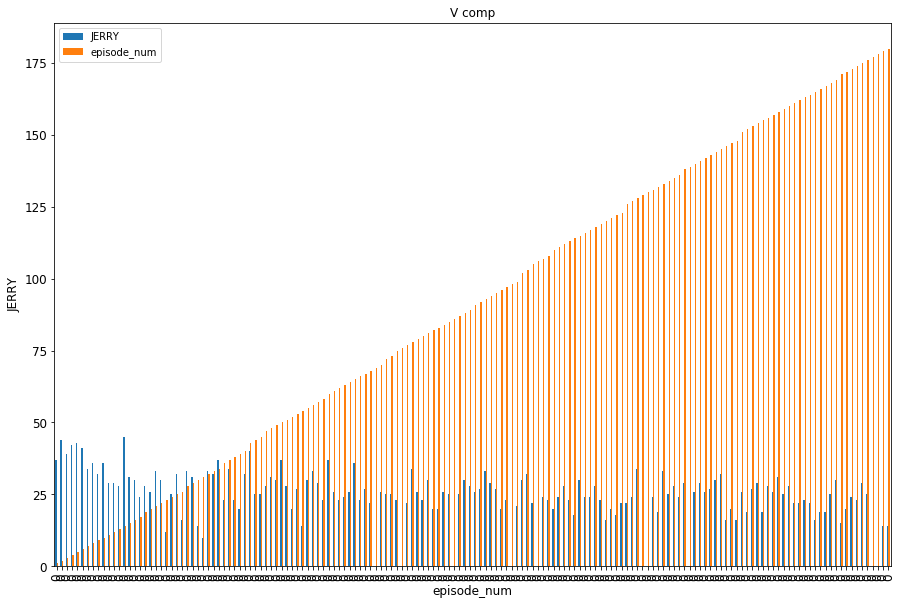

In [294]:
#pl = df_jerry.plot(x="episode_num",y="JERRY",xticks=df_jerry.episode_num,yticks=df_jerry.JERRY,figsize=(150,50),fontsize=20,color="red").bar()
#pl.get_xticks()
#pl.rc('axes', labelsize=12) 
#pl.locator_params(axis='episode_num',nticks=5)
#pyplot.locator_params(axis='x', nticks=10)
#plt.tick_params(axis='both', which='minor', labelsize=12)

#pl.tick_params(axis='both', which='minor', labelsize=22)
import matplotlib.pyplot as plt
#plt.savefig('/home/abhi/Desktop/hello.png')
            
ax = df_jerry.plot(kind='bar', title ="V comp", figsize=(15, 10), legend=True, fontsize=12)
ax.set_xlabel("episode_num", fontsize=12)
ax.set_ylabel("JERRY", fontsize=12)
plt.show()

In [112]:
 import matplotlib.pyplot as plt

In [173]:
%matplotlib inline


array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fa817c60b70>,
      dtype=object)

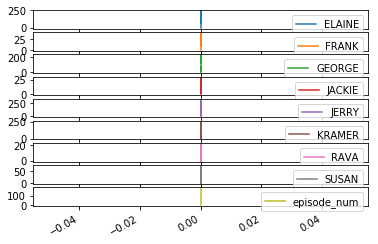

In [154]:
df.sort_values("episode_num").plot(subplots=True)

In [147]:
df.episode_num

0     11
0     36
0     40
0    155
0     81
0    167
0     43
0     97
0    105
0     10
0     48
0    152
0    119
0    126
0     91
0     68
0    171
0    118
0     19
0     37
0    102
0     33
0    110
0     39
0     34
0    131
0    133
0     95
0     63
0     61
    ... 
0    144
0     88
0     72
0    168
0    128
0    147
0     94
0     44
0     58
0     70
0     29
0     51
0    111
0     87
0     92
0     79
0    135
0    103
0     12
0     66
0    127
0     24
0    175
0    106
0     89
0     26
0    154
0    173
0     84
0     23
Name: episode_num, Length: 152, dtype: int64

In [169]:
%matplotlib notebook

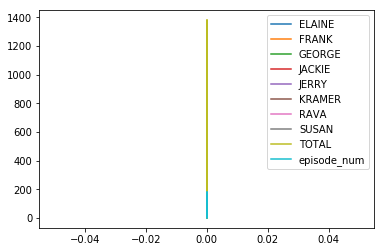

In [226]:
df.plot()

In [339]:
df_ = df.loc[:, df.columns != 'TOTAL']

In [340]:
df_.index = df_.episode_num

In [341]:
df__= df_.loc[:, df_.columns != 'episode_num']

In [342]:
df_jerry = df__[["JERRY"]]

In [343]:
df_george = df__[["GEORGE"]]

In [344]:
df_kramer = df__[["KRAMER"]]

In [345]:
df_elaine = df__[["ELAINE"]]

In [346]:
df_newman = df__[["NEWMAN"]]

In [347]:
df_susan = df__[["SUSAN"]]

In [348]:
df_rava = df__[["RAVA"]]

In [349]:
df_frank = df__[["FRANK"]]

In [350]:
df_fr_su = df__[["FRANK","SUSAN"]]

In [351]:
df_jackie = df__[["JACKIE"]]

In [352]:
df_el_ge = df__[["ELAINE","GEORGE"]]

In [353]:
df_el_kr = df__[["ELAINE","KRAMER"]]

In [354]:
df_ge_kr = df__[["GEORGE","KRAMER"]]

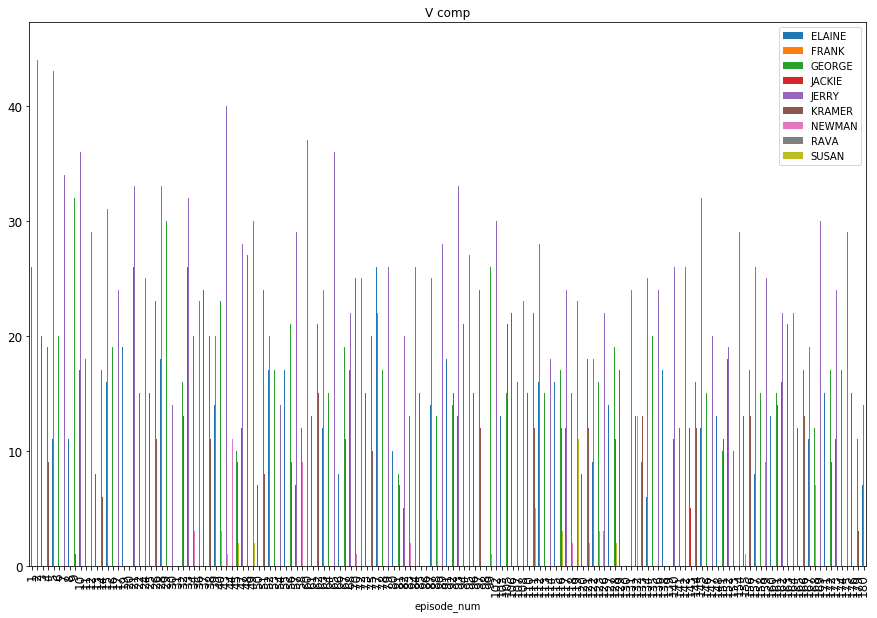

In [355]:
df__.plot(kind='bar', title ="V comp", figsize=(15, 10), legend=True, fontsize=12)

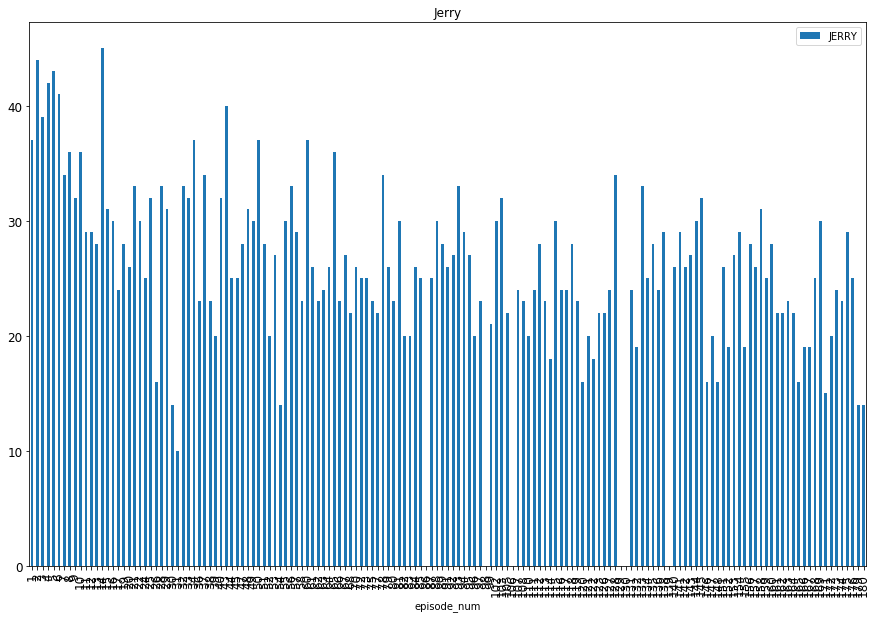

In [356]:
df_jerry.plot(kind='bar', title ="Jerry", figsize=(15, 10), legend=True, fontsize=12)

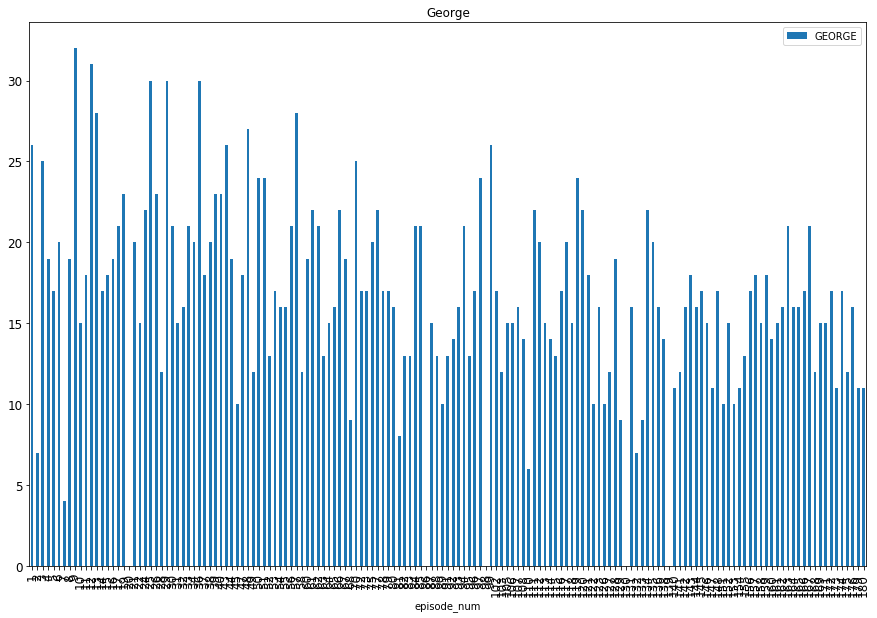

In [357]:
df_george.plot(kind='bar', title ="George", figsize=(15, 10), legend=True, fontsize=12)

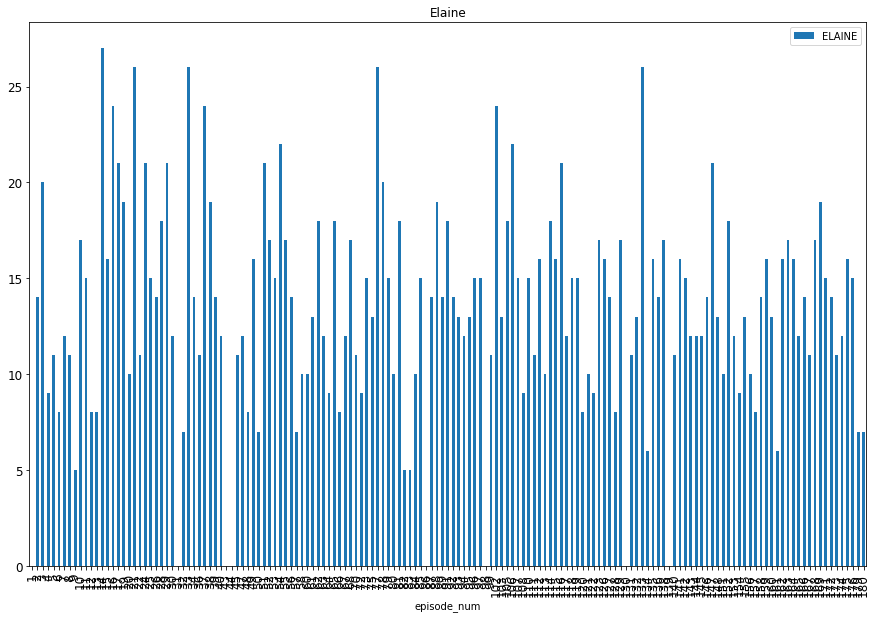

In [358]:
df_elaine.plot(kind='bar', title ="Elaine", figsize=(15, 10), legend=True, fontsize=12)

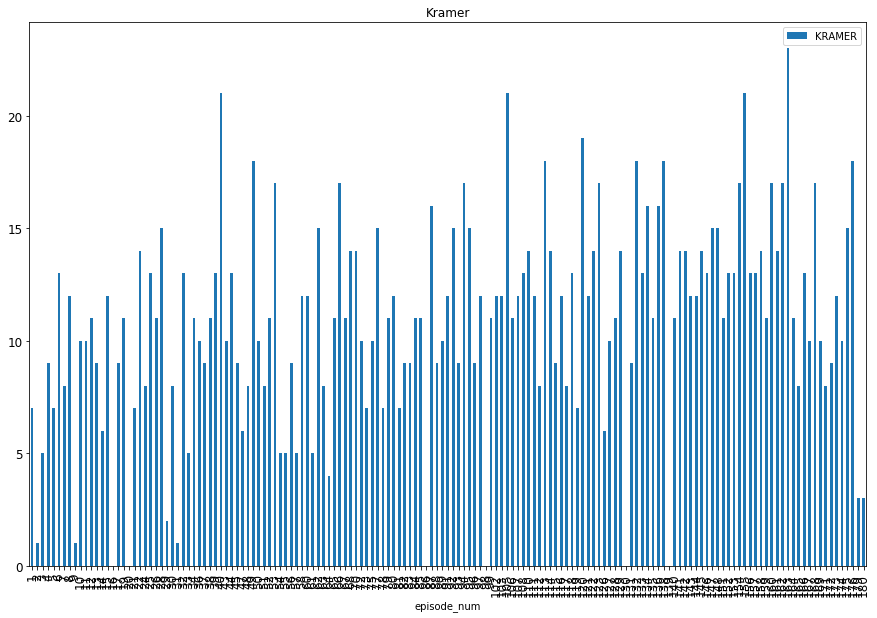

In [359]:
df_kramer.plot(kind='bar', title ="Kramer", figsize=(15, 10), legend=True, fontsize=12)

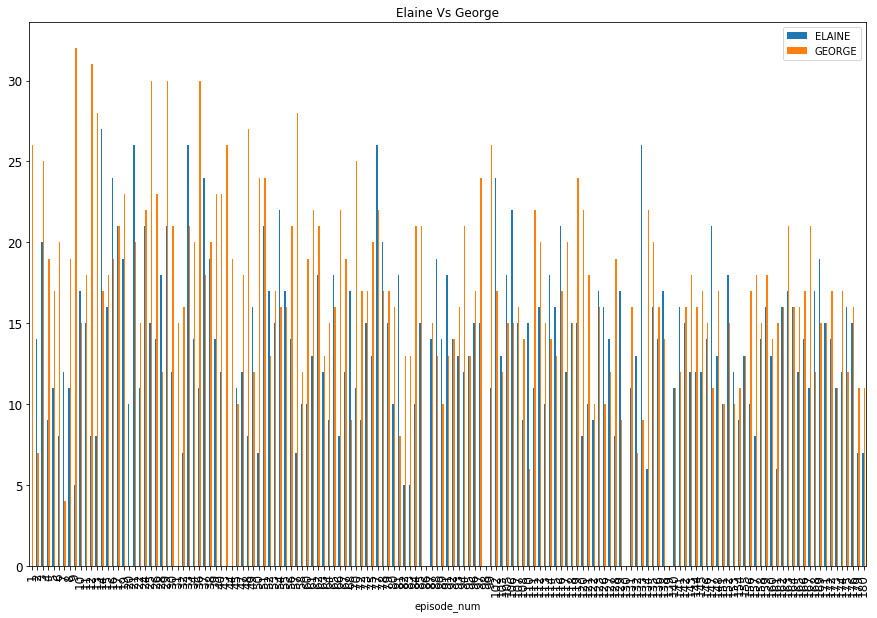

In [360]:
df_el_ge.plot(kind='bar', title ="Elaine Vs George", figsize=(15, 10), legend=True, fontsize=12)

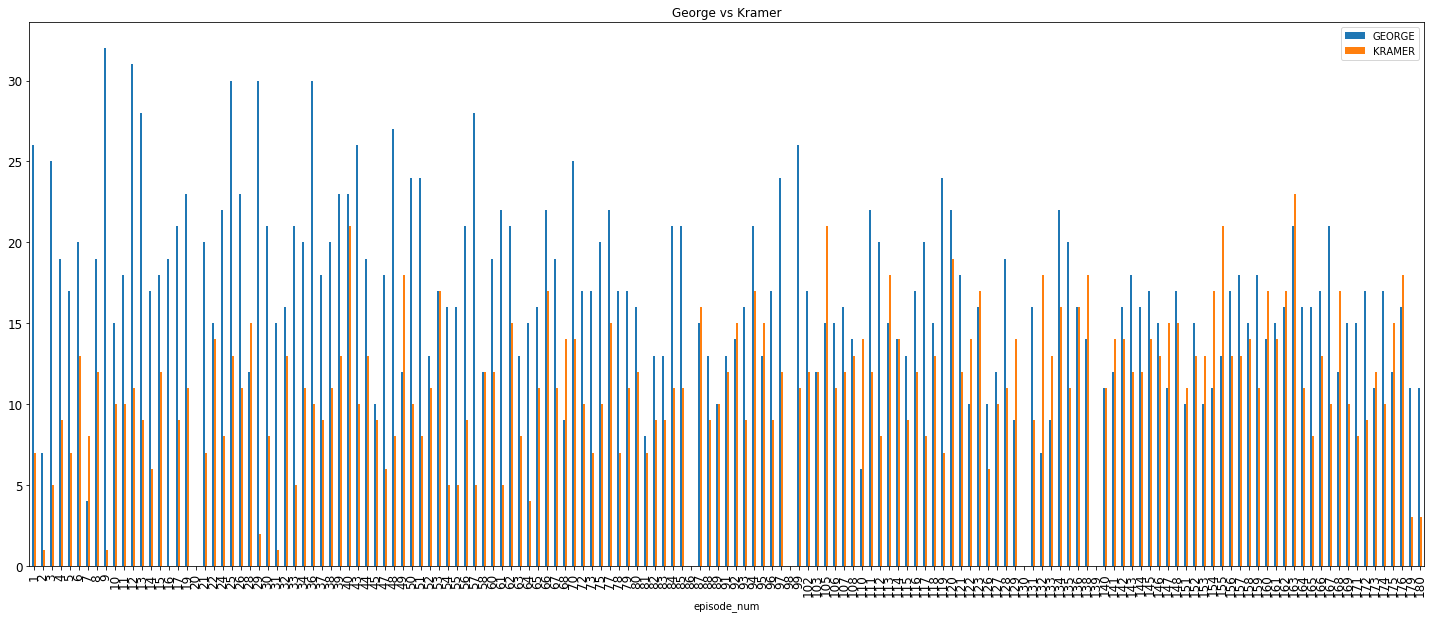

In [361]:
df_ge_kr.plot(kind='bar', title ="George vs Kramer", figsize=(25, 10), legend=True, fontsize=12)

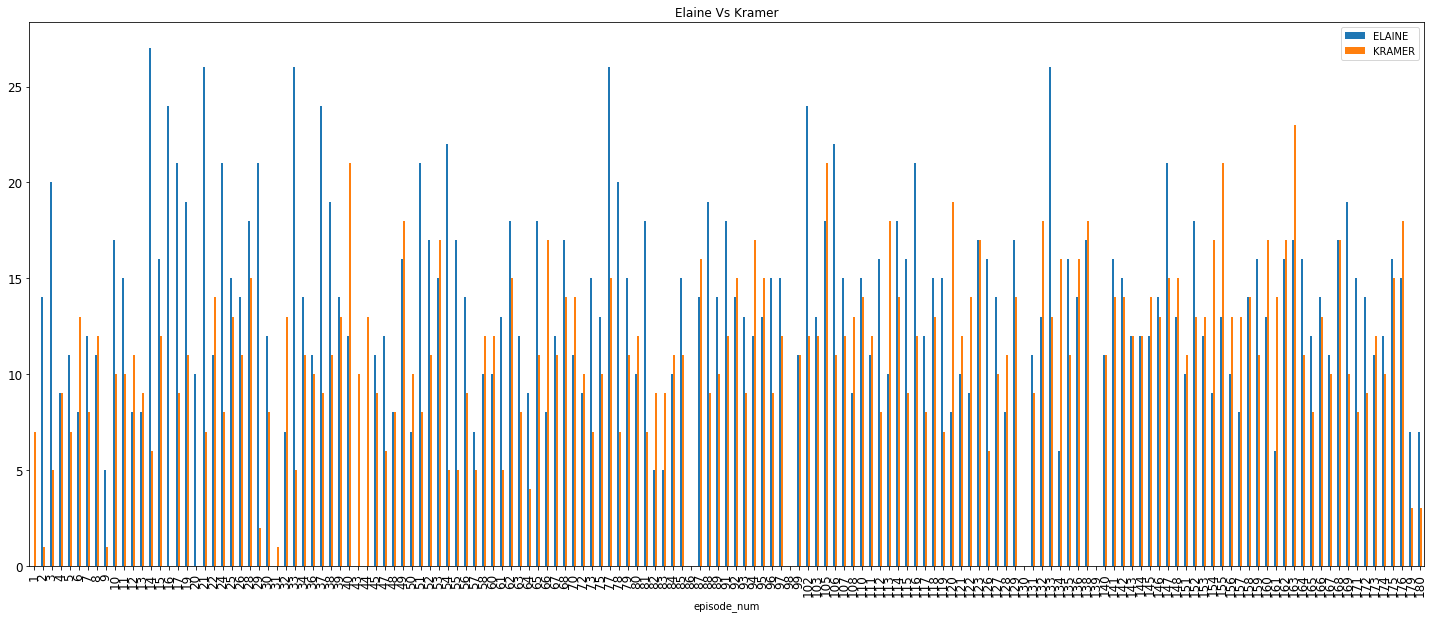

In [362]:
df_el_kr.plot(kind='bar', title ="Elaine Vs Kramer", figsize=(25, 10), legend=True, fontsize=12)

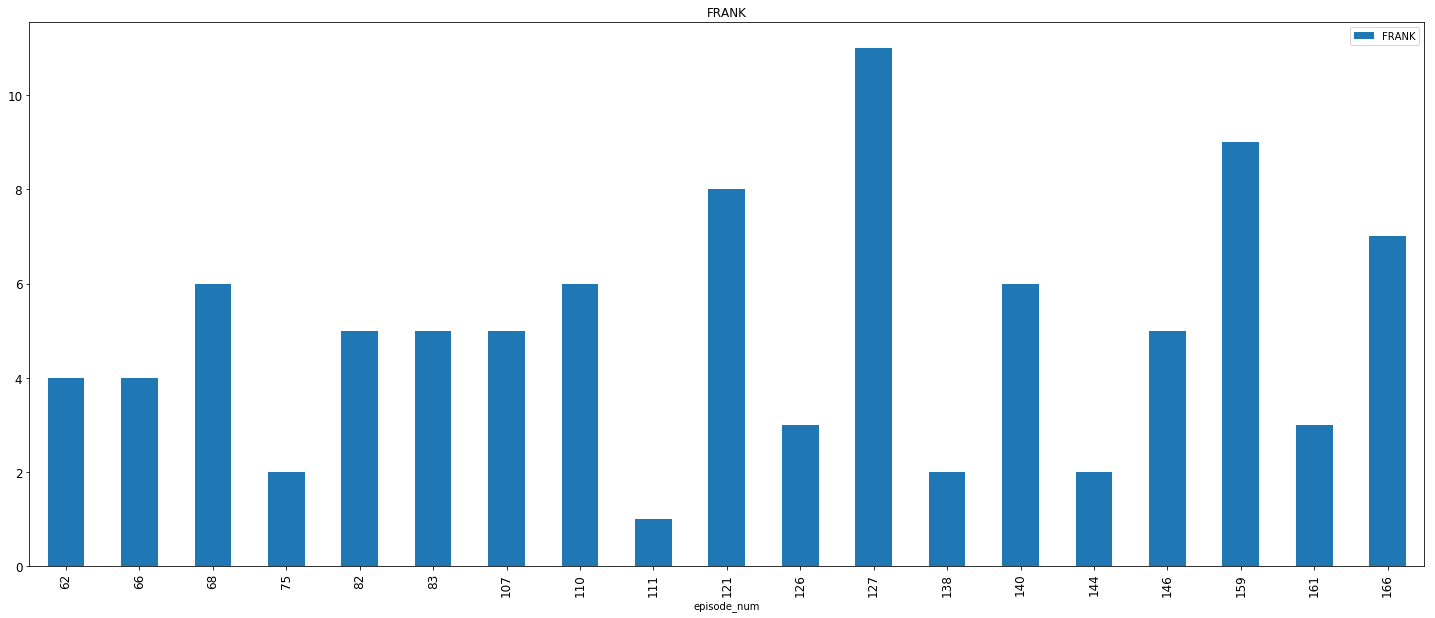

In [363]:
df_frank = df_frank.replace(0,np.NaN)
df_frank.dropna().sort_index().plot(kind='bar', title ="FRANK", figsize=(25, 10), legend=True, fontsize=12)

In [251]:
import numpy as np

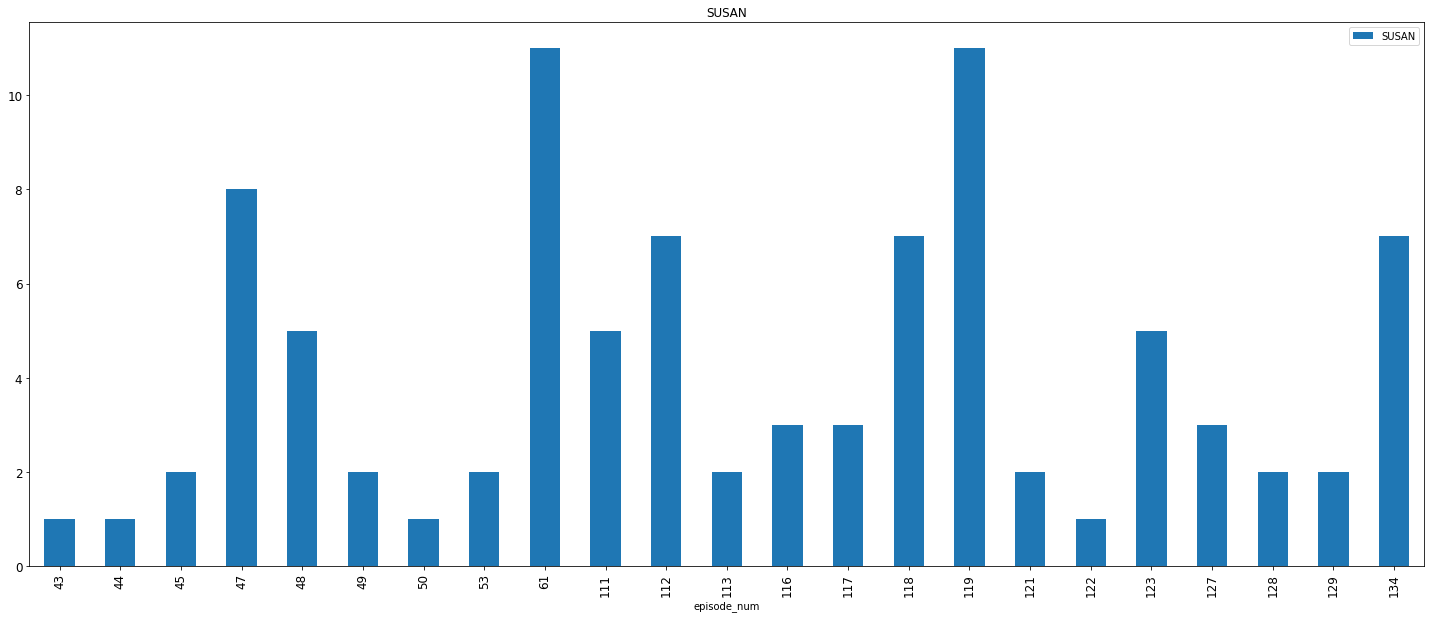

In [364]:
df_susan = df_susan.replace(0,np.NaN)
df_susan.dropna().sort_index().plot(kind='bar', title ="SUSAN", figsize=(25, 10), legend=True, fontsize=12)

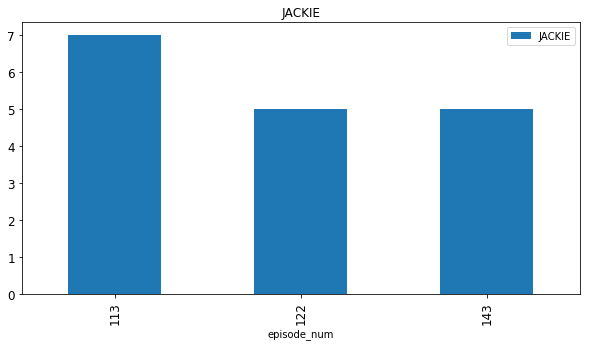

In [365]:
df_jackie = df_jackie.replace(0,np.NaN)
df_jackie.dropna().sort_index().plot(kind='bar', title ="JACKIE", figsize=(10, 5), legend=True, fontsize=12)

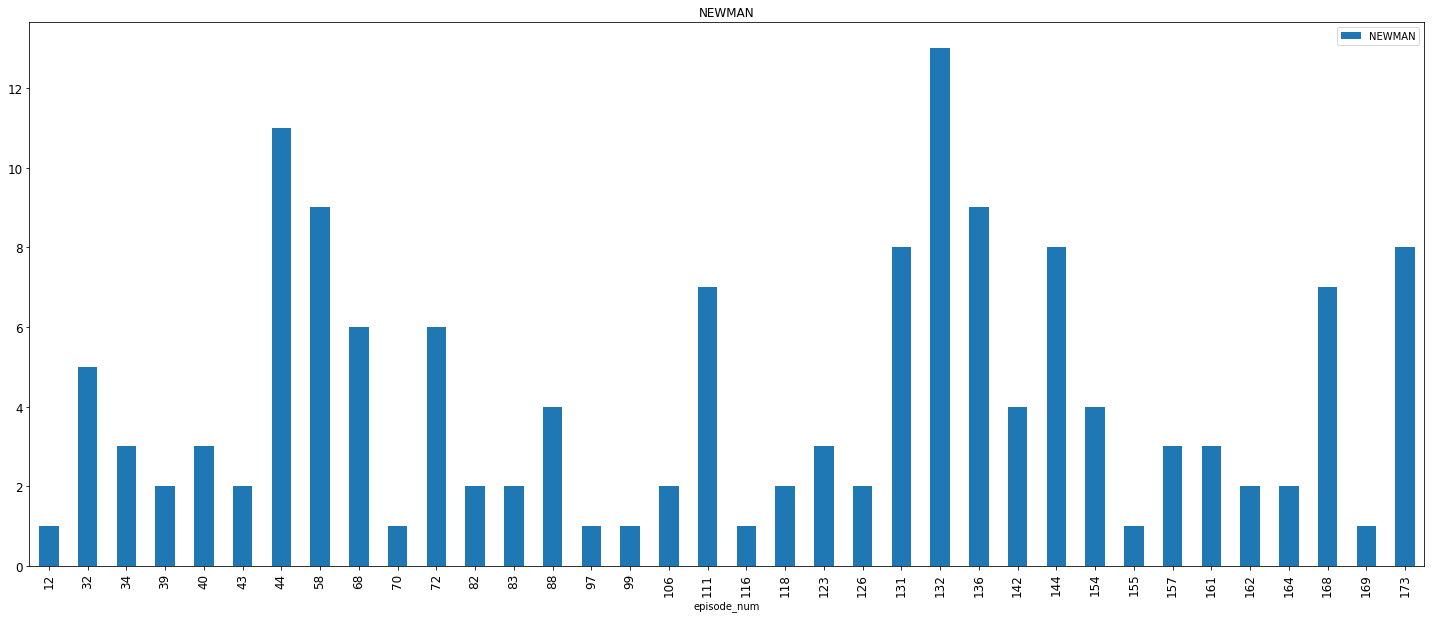

In [366]:
df_newman = df_newman.replace(0,np.NaN)
df_newman.dropna().sort_index().plot(kind='bar', title ="NEWMAN", figsize=(25, 10), legend=True, fontsize=12)

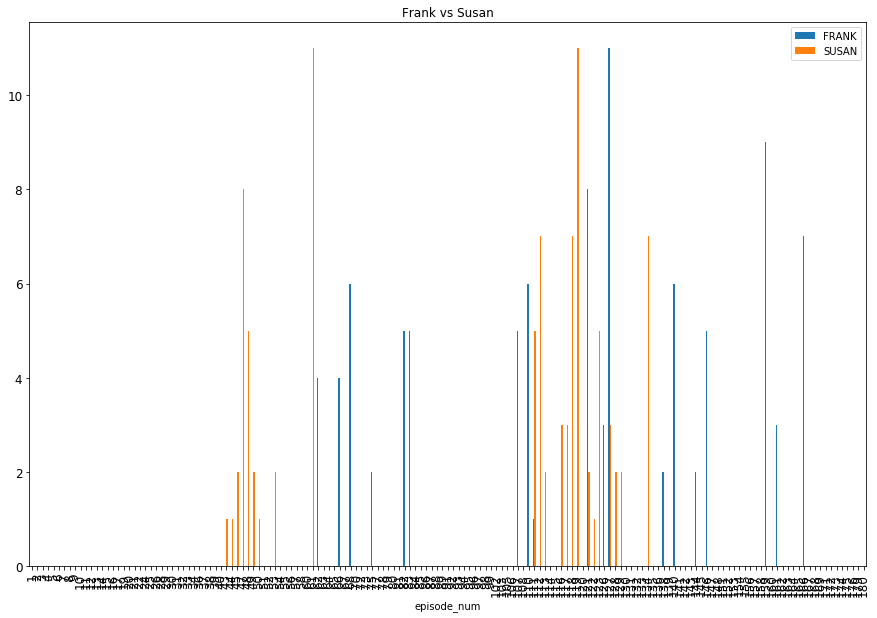

In [367]:
df_fr_su.sort_index().plot(kind='bar', title ="Frank vs Susan", figsize=(15, 10), legend=True, fontsize=12)

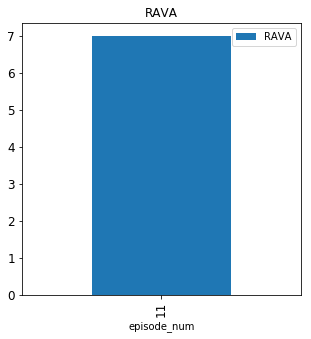

In [368]:
df_rava = df_rava.replace(0,np.NaN)
df_rava.dropna().sort_index().plot(kind='bar', title ="RAVA", figsize=(5, 5), legend=True, fontsize=12)